In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv('Airbnb_data.csv')
df.shape

(74111, 29)

In [5]:
# Display the first few rows of the dataset
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [6]:
features = [
    'accommodates', 'bathrooms', 'bedrooms','beds', 'cleaning_fee',
    'host_response_rate', 'instant_bookable', 'review_scores_rating',
    'latitude', 'longitude','cancellation_policy', 'log_price'
]

# Filter the dataset to include only the important features
df = df[features]

In [7]:
# Display the filtered data to check
df.head()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_response_rate,instant_bookable,review_scores_rating,latitude,longitude,cancellation_policy,log_price
0,3,1.0,1.0,1.0,True,NaN,f,100.0,40.696524,-73.991617,strict,5.010635
1,7,1.0,3.0,3.0,True,100%,t,93.0,40.766115,-73.989040,strict,5.129899
2,5,1.0,1.0,3.0,True,100%,t,92.0,40.808110,-73.943756,moderate,4.976734
3,4,1.0,2.0,2.0,True,NaN,f,NaN,37.772004,-122.431619,flexible,6.620073
4,2,1.0,0.0,1.0,True,100%,t,40.0,38.925627,-77.034596,moderate,4.744932


In [8]:
# Check for missing values
missing_data = df.isnull().sum()
print(f"\nMissing Values:\n{missing_data[missing_data > 0]}")


Missing Values:
bathrooms                 200
bedrooms                   91
beds                      131
host_response_rate      18299
review_scores_rating    16722
dtype: int64


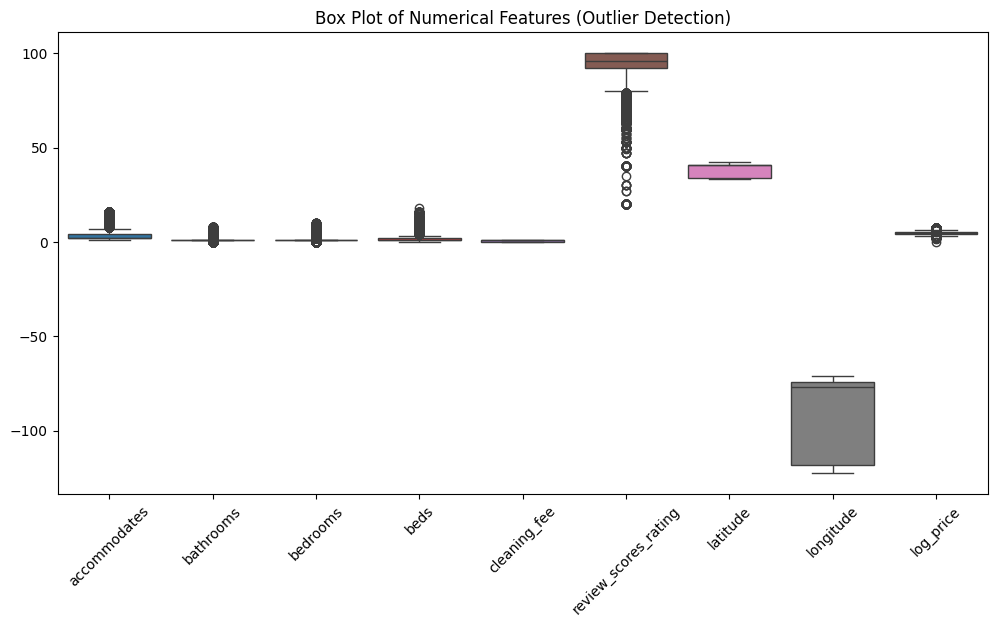

In [9]:
# Create a box plot to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)

# Add title and format x-axis labels
plt.title("Box Plot of Numerical Features (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Convert 'host_response_rate' to numeric by removing '%' and then converting to float
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

# Handle missing values in numerical columns with median
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].median(), inplace=True)


<ipython-input-10-057116735f90>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
<ipython-input-10-057116735f90>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [11]:
missing_data = df.isnull().sum()
print(f"\nMissing Values:\n{missing_data[missing_data > 0]}")


Missing Values:
Series([], dtype: int64)


In [12]:
# Initialize LabelEncoder for cleaning_fee and instant_bookable columns
label_encoder = LabelEncoder()
# Label encoding for cleaning_fee (TRUE/FALSE) and instant_bookable (t/f)
df['cleaning_fee'] = label_encoder.fit_transform(df['cleaning_fee'])
df['instant_bookable'] = label_encoder.fit_transform(df['instant_bookable'])
df['cancellation_policy'] = label_encoder.fit_transform(df['cancellation_policy'])

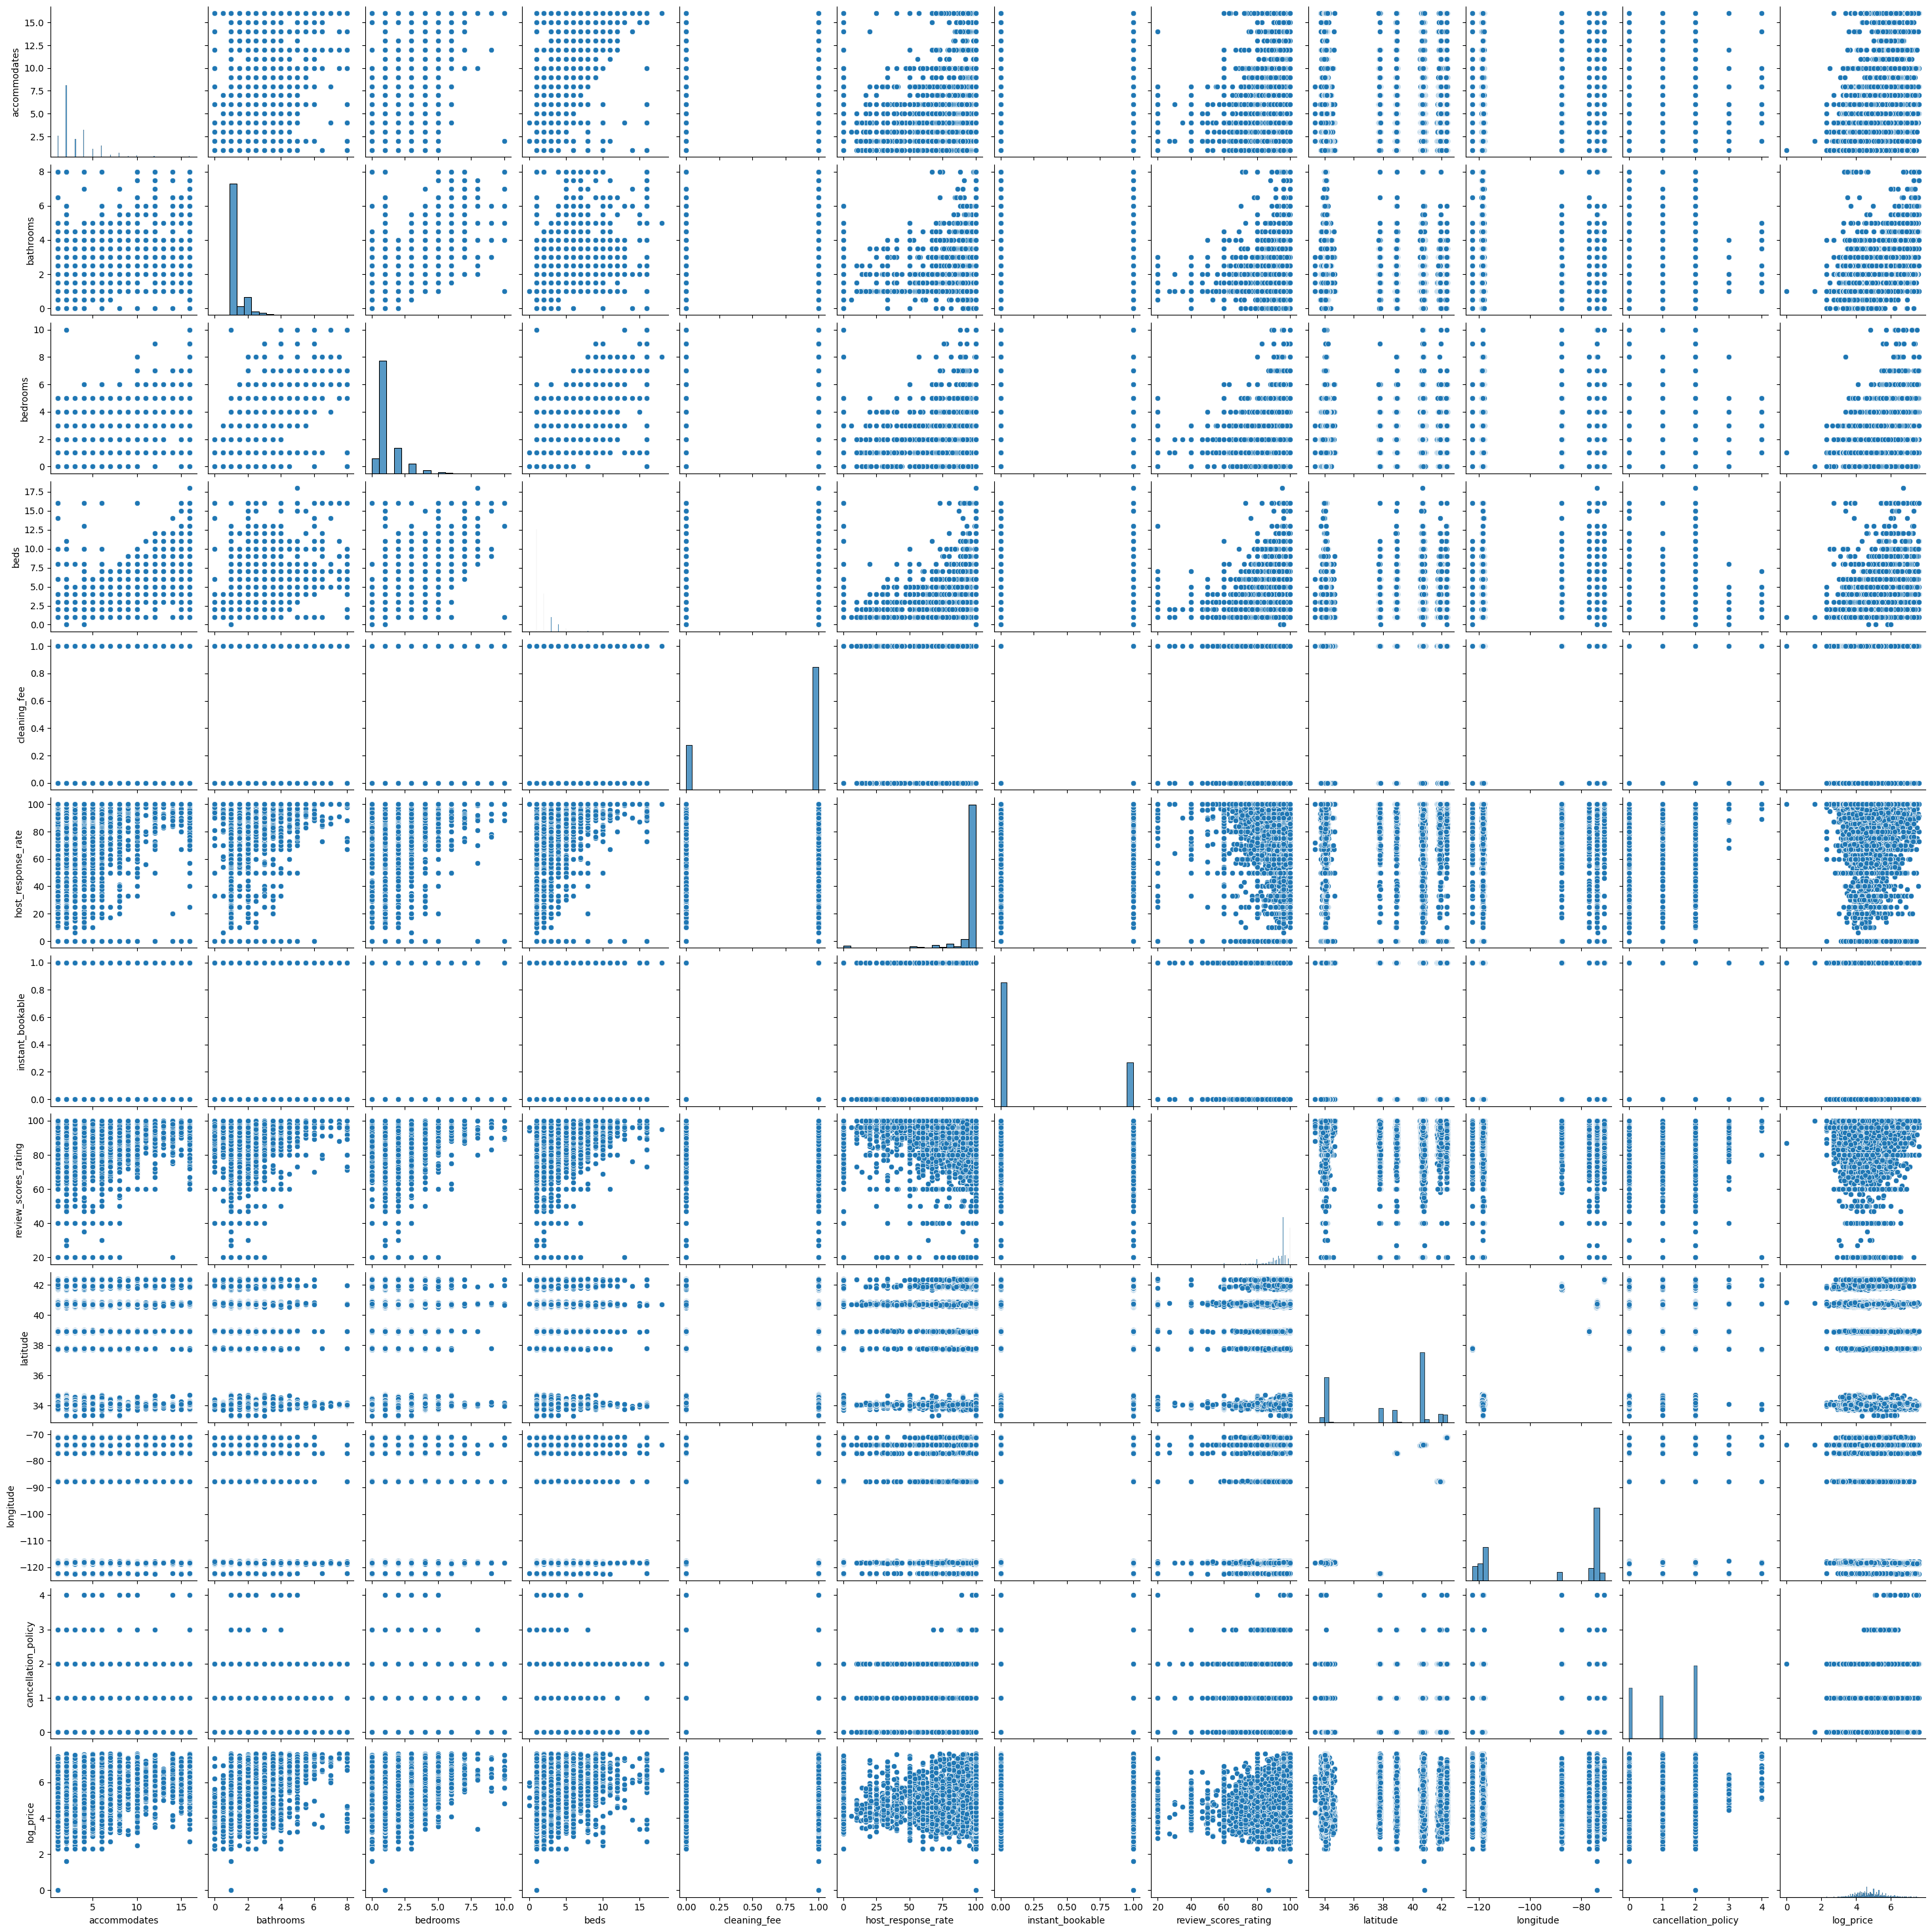

In [13]:

sns.pairplot(df)

# Show the plot
plt.show()

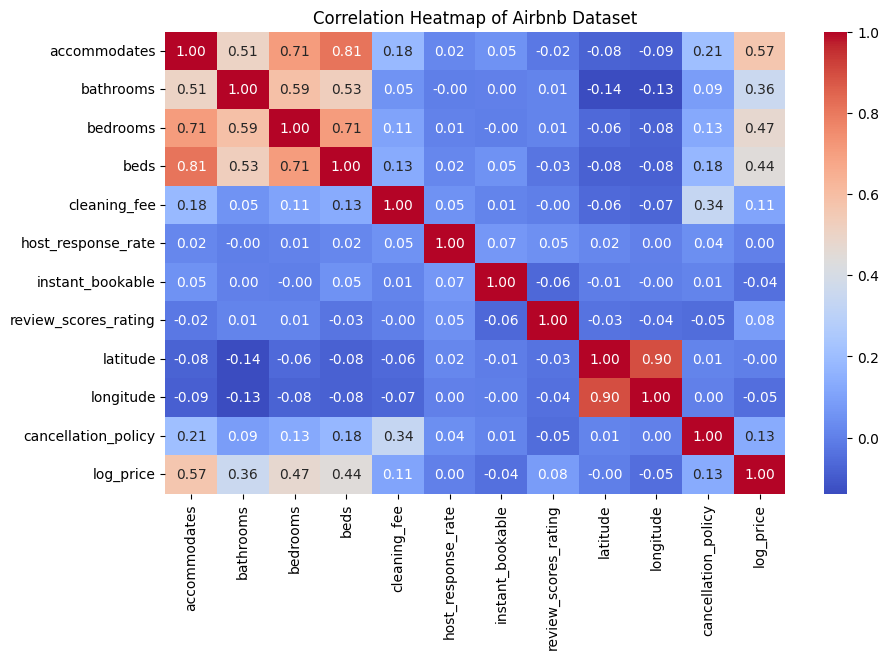

In [14]:
#Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Airbnb Dataset")
plt.show()


In [15]:
df.tail()

,accommodates,bathrooms,bedrooms,beds,cleaning_fee,host_response_rate,instant_bookable,review_scores_rating,latitude,longitude,cancellation_policy,log_price
74106,1,1.0,1.0,1.0,0,100.0,0,96.0,40.709025,-73.939405,0,4.605170
74107,4,2.0,2.0,4.0,1,100.0,0,93.0,33.871549,-118.396053,1,5.043425
74108,5,1.0,2.0,2.0,1,100.0,1,94.0,40.706749,-73.942377,1,5.220356
74109,2,1.0,0.0,2.0,1,100.0,1,96.0,40.738535,-74.000157,2,5.273000
74110,4,1.0,1.0,2.0,0,100.0,0,96.0,33.761096,-118.192409,1,4.852030


In [16]:
# Split data into features (X) and target (y)
X = df.drop(columns=['log_price'])
y = df['log_price']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# 1. Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# 2. Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 3. XGBoost Regressor Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Model Evaluation - RMSE, MAE, and R²
def evaluate_model(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # RMSE
    mae = mean_absolute_error(y_true, y_pred)  # MAE
    r2 = r2_score(y_true, y_pred)  # R²

    print(f'{model_name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}')

# Evaluate models
evaluate_model('Linear Regression', y_test, lr_pred)
evaluate_model('Random Forest Regressor', y_test, rf_pred)
evaluate_model('XGBoost Regressor', y_test, xgb_pred)

Linear Regression - RMSE: 0.5771, MAE: 0.4406, R²: 0.3516
Random Forest Regressor - RMSE: 0.4412, MAE: 0.3224, R²: 0.6210
XGBoost Regressor - RMSE: 0.4302, MAE: 0.3179, R²: 0.6398


In [21]:
# Mapping for cancellation policies
cancellation_mapping = {'strict': 3, 'moderate': 2, 'flexible': 1}

# Function for user input and prediction
def predict_listing_price(model):
    # Ask for user input
    accommodates = int(input("Enter the number of guests the property can accommodate: "))
    bathrooms = float(input("Enter the number of bathrooms: "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    beds = int(input("Enter the number of beds: "))
    cleaning_fee = input("Is there a cleaning fee (TRUE/FALSE)? ").strip().upper() == "TRUE"  # Convert to boolean
    host_response_rate = float(input("Enter host response rate (e.g., 95.0 for 95%): ")) / 100
    instant_bookable = input("Is the listing instantly bookable (t/f)? ").strip().lower() == "t"
    review_scores_rating = float(input("Enter the average review score: "))
    latitude = float(input("Enter the latitude coordinate: "))
    longitude = float(input("Enter the longitude coordinate: "))
    cancellation_policy = input("Enter the cancellation policy (strict, moderate, flexible): ").strip().lower()

    # Prepare the input as a list or array
    input_data = [
        accommodates, bathrooms, bedrooms, beds,
        int(cleaning_fee), host_response_rate, int(instant_bookable),
        review_scores_rating, latitude, longitude,
        cancellation_mapping.get(cancellation_policy, 0)  # Default to 0 if invalid
    ]

    # Convert input data into the right shape (1 row, 11 features)
    input_data = np.array(input_data).reshape(1, -1)

    # Make prediction using the model (log_price prediction)
    log_price_pred = model.predict(input_data)

    # Convert log_price to actual price using exponential function
    actual_price_pred = np.exp(log_price_pred[0])  # Reverse the log transformation

    # Print the result
    print(f"\n\t\tPredicted log_price: {log_price_pred[0]:.4f}")
    print(f"\t\tPredicted actual price: ${actual_price_pred:.2f}")

# Ask user which model to use
model_choice = input("Choose a model for prediction (1.Linear Regression / 2.Random Forest / 3.XGBoost): ").strip().lower()

if model_choice == 'linear regression':
    predict_listing_price(lr_model)
elif model_choice == 'random forest':
    predict_listing_price(rf_model)
elif model_choice == 'xgboost':
    predict_listing_price(xgb_model)
else:
    print("Invalid choice. Please choose one of the available models.")

Choose a model for prediction (1.Linear Regression / 2.Random Forest / 3.XGBoost): XGBoost
Enter the number of guests the property can accommodate: 5
Enter the number of bathrooms: 3
Enter the number of bedrooms: 6
Enter the number of beds: 8
Is there a cleaning fee (TRUE/FALSE)? TRUE
Enter host response rate (e.g., 95.0 for 95%): 85
Is the listing instantly bookable (t/f)? f
Enter the average review score: 3.54
Enter the latitude coordinate: 85.112
Enter the longitude coordinate: 69.964
Enter the cancellation policy (strict, moderate, flexible): moderate

		Predicted log_price: 6.3926
		Predicted actual price: $597.42
